Chemical_Lab_Apparatus_Training_YOLOv8

In [ ]:
!nvidia-smi

Mon Apr 28 16:08:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# Verify installation
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print("Current working directory:", HOME)

# Create directory for datasets
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

Current working directory: /content
/content/datasets


In [ ]:
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(8)
dataset = version.download("yolov8")

%cd {HOME}

loading Roboflow workspace...
loading Roboflow project...
/content


In [ ]:
# List the contents of dataset directory
!ls {dataset.location}

# Check the data.yaml file
!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
names:
- Beaker
- Buchner_Funnel
- Burette_Stands
- Calorimeter
- Conical_Flask
- Funnel
- Glass_Rod
- Measuring_Cylinder
- Mechanical_Balance_Scale
- Nessler_Reagent_Bottle
- Pipette
- Porcelain_Mortar Pestle
- Precision_Weight_Scale
- Reagent_Bottle
- Round_Bottom_Flask_Borosilicate_Glass_1_Neck
- Round_Bottom_Flask_Borosilicate_Glass_2_Neck
- Round_Bottom_Flask_Borosilicate_Glass_3_Neck
- Separating_Funnel
- Spirit_Lamp
- TestTube_Holder
- Test_Tube
- Volumetric_Flask
- Volumetric_Pipet
- Wash_Bottle
- Weighing_Bottle
nc: 25
roboflow:
  license: CC BY 4.0
  project: chemistry-lab-apparatus-detn
  url: https://universe.roboflow.com/dip-project-cktfe/chemistry-lab-apparatus-detn/dataset/8
  version: 8
  workspace: dip-project-cktfe
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
!pip install -U ultralytics

  Using cached ultralytics-8.3.119-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.119-py3-none-any.whl (1.0 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.103
    Uninstalling ultralytics-8.2.103:
      Successfully uninstalled ultralytics-8.2.103


In [ ]:

!pip install -U ultralytics roboflow
from roboflow import Roboflow
import os


rf = Roboflow(api_key="")
project = rf.workspace("").project("")
dataset = project.version(8).download("yolov8")

print(f"Dataset downloaded to: {dataset.location}")
print(f"Full data.yaml path: {dataset.location}/data.yaml")

loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/Chemistry-Lab-Apparatus-DETN-8
Full data.yaml path: /content/Chemistry-Lab-Apparatus-DETN-8/data.yaml


In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8s.pt')
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='chemistry_custom_model'
)

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Chemistry-Lab-Apparatus-DETN-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=chemistry_custom_model6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 9.74MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1063.0±636.1 MB/s, size: 32.1 KB)


train: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/train/labels... 3220 images, 4 backgrounds, 0 corrupt: 100%|██████████| 3220/3220 [00:01<00:00, 2384.58it/s]

train: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 162, len(boxes) = 4863. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 428.8±168.9 MB/s, size: 33.7 KB)


val: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels... 920 images, 1 backgrounds, 0 corrupt: 100%|██████████| 920/920 [00:00<00:00, 927.10it/s]

val: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 23, len(boxes) = 1393. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/chemistry_custom_model6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/chemistry_custom_model6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.82G      1.575      3.354      1.739         18        640: 100%|██████████| 202/202 [01:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.73it/s]


                   all        920       1393      0.815       0.78      0.854      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.64G      1.296      1.515      1.431         14        640: 100%|██████████| 202/202 [01:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.03it/s]

                   all        920       1393      0.828      0.854      0.905       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.67G      1.275      1.301      1.407         20        640: 100%|██████████| 202/202 [01:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        920       1393      0.841      0.878      0.909      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.71G      1.263      1.177      1.393         19        640: 100%|██████████| 202/202 [01:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.25it/s]

                   all        920       1393      0.854      0.917      0.948       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.74G      1.244       1.08      1.369         10        640: 100%|██████████| 202/202 [01:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.08it/s]

                   all        920       1393      0.905      0.926      0.951      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.78G       1.23       1.03      1.352          8        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.30it/s]

                   all        920       1393      0.915      0.927      0.962      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.81G      1.209     0.9624      1.336         15        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.08it/s]

                   all        920       1393      0.946      0.925      0.969      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.85G      1.189     0.9259       1.32         12        640: 100%|██████████| 202/202 [01:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.38it/s]

                   all        920       1393      0.931      0.936      0.956      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.89G      1.185     0.8905      1.316         14        640: 100%|██████████| 202/202 [01:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.06it/s]

                   all        920       1393       0.94      0.939       0.97      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.92G      1.166     0.8755      1.306         12        640: 100%|██████████| 202/202 [01:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393       0.94      0.945      0.972       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.96G      1.149     0.8465      1.293         13        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.11it/s]

                   all        920       1393      0.941      0.951      0.971      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.99G      1.141     0.8239      1.287          7        640: 100%|██████████| 202/202 [00:59<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.09it/s]

                   all        920       1393      0.924      0.967      0.969      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.03G      1.122     0.7858      1.284         15        640: 100%|██████████| 202/202 [01:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.21it/s]

                   all        920       1393      0.944      0.958       0.97      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.07G      1.119     0.8014       1.28         13        640: 100%|██████████| 202/202 [01:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.10it/s]

                   all        920       1393      0.963      0.967       0.98      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.1G      1.106     0.7535      1.265         10        640: 100%|██████████| 202/202 [01:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.35it/s]

                   all        920       1393      0.947      0.967      0.976      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.14G      1.119      0.754      1.261         16        640: 100%|██████████| 202/202 [01:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.08it/s]

                   all        920       1393      0.948      0.972      0.981      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.18G      1.106     0.7404       1.27         12        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]

                   all        920       1393      0.952      0.967      0.978      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.21G      1.083     0.7236      1.254         13        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.956       0.97       0.98      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.25G      1.085     0.7123      1.256         10        640: 100%|██████████| 202/202 [01:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.964      0.966      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.28G      1.072     0.7071      1.247         10        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.18it/s]

                   all        920       1393      0.954       0.98      0.982      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.32G      1.073     0.6993      1.249         18        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.958      0.974      0.982      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.36G      1.061     0.6895      1.241         13        640: 100%|██████████| 202/202 [01:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.30it/s]

                   all        920       1393      0.952      0.975      0.982       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.39G      1.045     0.6524      1.224         11        640: 100%|██████████| 202/202 [01:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.04it/s]

                   all        920       1393       0.97      0.972      0.983      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.43G      1.039     0.6633      1.232         11        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.33it/s]

                   all        920       1393      0.957      0.976      0.982      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.47G      1.025     0.6464      1.217         20        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.08it/s]

                   all        920       1393      0.959      0.977      0.984      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.5G       1.03     0.6408      1.221         14        640: 100%|██████████| 202/202 [01:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.36it/s]

                   all        920       1393      0.958      0.977      0.982      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.54G      1.021     0.6345       1.22         12        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.962      0.974      0.981      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.57G      1.015     0.6342      1.216          8        640: 100%|██████████| 202/202 [01:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.969      0.973      0.985      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.61G      1.008     0.6068      1.208         13        640: 100%|██████████| 202/202 [01:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.24it/s]

                   all        920       1393      0.972      0.975      0.984      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.65G       1.01     0.6036      1.218         13        640: 100%|██████████| 202/202 [01:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]

                   all        920       1393      0.963      0.975      0.982      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.68G     0.9943     0.5989      1.203         19        640: 100%|██████████| 202/202 [01:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.11it/s]

                   all        920       1393      0.971      0.974      0.986      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.72G     0.9836     0.5788       1.19          9        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.967      0.975      0.986      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.76G     0.9791      0.574      1.186         17        640: 100%|██████████| 202/202 [01:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.967      0.977      0.985      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.79G     0.9817     0.5656      1.192         14        640: 100%|██████████| 202/202 [01:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.02it/s]

                   all        920       1393      0.966      0.978      0.987      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.83G     0.9832      0.584        1.2         10        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.40it/s]

                   all        920       1393      0.965      0.976      0.984      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.19G     0.9621     0.5614      1.191         15        640: 100%|██████████| 202/202 [01:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.971      0.973      0.987      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.22G     0.9575     0.5648      1.185         13        640: 100%|██████████| 202/202 [01:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]

                   all        920       1393      0.969      0.974      0.984      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.26G     0.9468     0.5432      1.176          8        640: 100%|██████████| 202/202 [01:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.967      0.974      0.983      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       6.3G     0.9634     0.5515       1.19          6        640: 100%|██████████| 202/202 [01:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.968      0.971      0.984      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.33G     0.9379     0.5353      1.172         10        640: 100%|██████████| 202/202 [01:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.29it/s]

                   all        920       1393      0.961      0.979      0.983      0.721


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.37G     0.8727     0.3864      1.173          6        640: 100%|██████████| 202/202 [01:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.968      0.973      0.984      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.41G     0.8527     0.3687      1.172          5        640: 100%|██████████| 202/202 [00:59<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.22it/s]

                   all        920       1393       0.97      0.974      0.981       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.44G     0.8457     0.3591      1.165          8        640: 100%|██████████| 202/202 [00:59<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.22it/s]

                   all        920       1393      0.966      0.975      0.985      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.48G     0.8315     0.3556      1.156          5        640: 100%|██████████| 202/202 [00:58<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.965      0.974      0.982       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.52G     0.8195     0.3491      1.149          7        640: 100%|██████████| 202/202 [00:58<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.968      0.972      0.983      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.55G     0.8121     0.3431       1.15          5        640: 100%|██████████| 202/202 [00:59<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.38it/s]

                   all        920       1393       0.97       0.97      0.985      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.59G     0.8014     0.3389      1.134          9        640: 100%|██████████| 202/202 [00:59<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.10it/s]

                   all        920       1393      0.969      0.975      0.984       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.62G     0.7939     0.3346       1.13         11        640: 100%|██████████| 202/202 [00:58<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.968      0.975      0.984      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.66G      0.788     0.3308       1.13          5        640: 100%|██████████| 202/202 [00:59<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]

                   all        920       1393      0.968      0.976      0.983      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.7G     0.7804       0.33       1.13          4        640: 100%|██████████| 202/202 [00:59<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.13it/s]

                   all        920       1393      0.966      0.973      0.983      0.734



50 epochs completed in 0.980 hours.
Optimizer stripped from runs/detect/chemistry_custom_model6/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/chemistry_custom_model6/weights/best.pt, 22.5MB

Validating runs/detect/chemistry_custom_model6/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,135,259 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.48it/s]


                   all        920       1393      0.966      0.973      0.983      0.734
                Beaker         78         79      0.962      0.964       0.99      0.747
        Buchner_Funnel         44         56      0.982          1      0.989      0.769
        Burette_Stands         57         57      0.933          1      0.993      0.733
           Calorimeter         66         66      0.879      0.992      0.947      0.778
         Conical_Flask         78         79      0.981      0.873      0.975      0.763
                Funnel         47         48          1      0.958      0.994      0.737
             Glass_Rod         57         90       0.97          1      0.988      0.702
    Measuring_Cylinder         43         49      0.954          1      0.972      0.683
Mechanical_Balance_Scale         47         47      0.944      0.957      0.991      0.768
Nessler_Reagent_Bottle         50         51      0.953      0.941      0.981      0.779
               Pipe

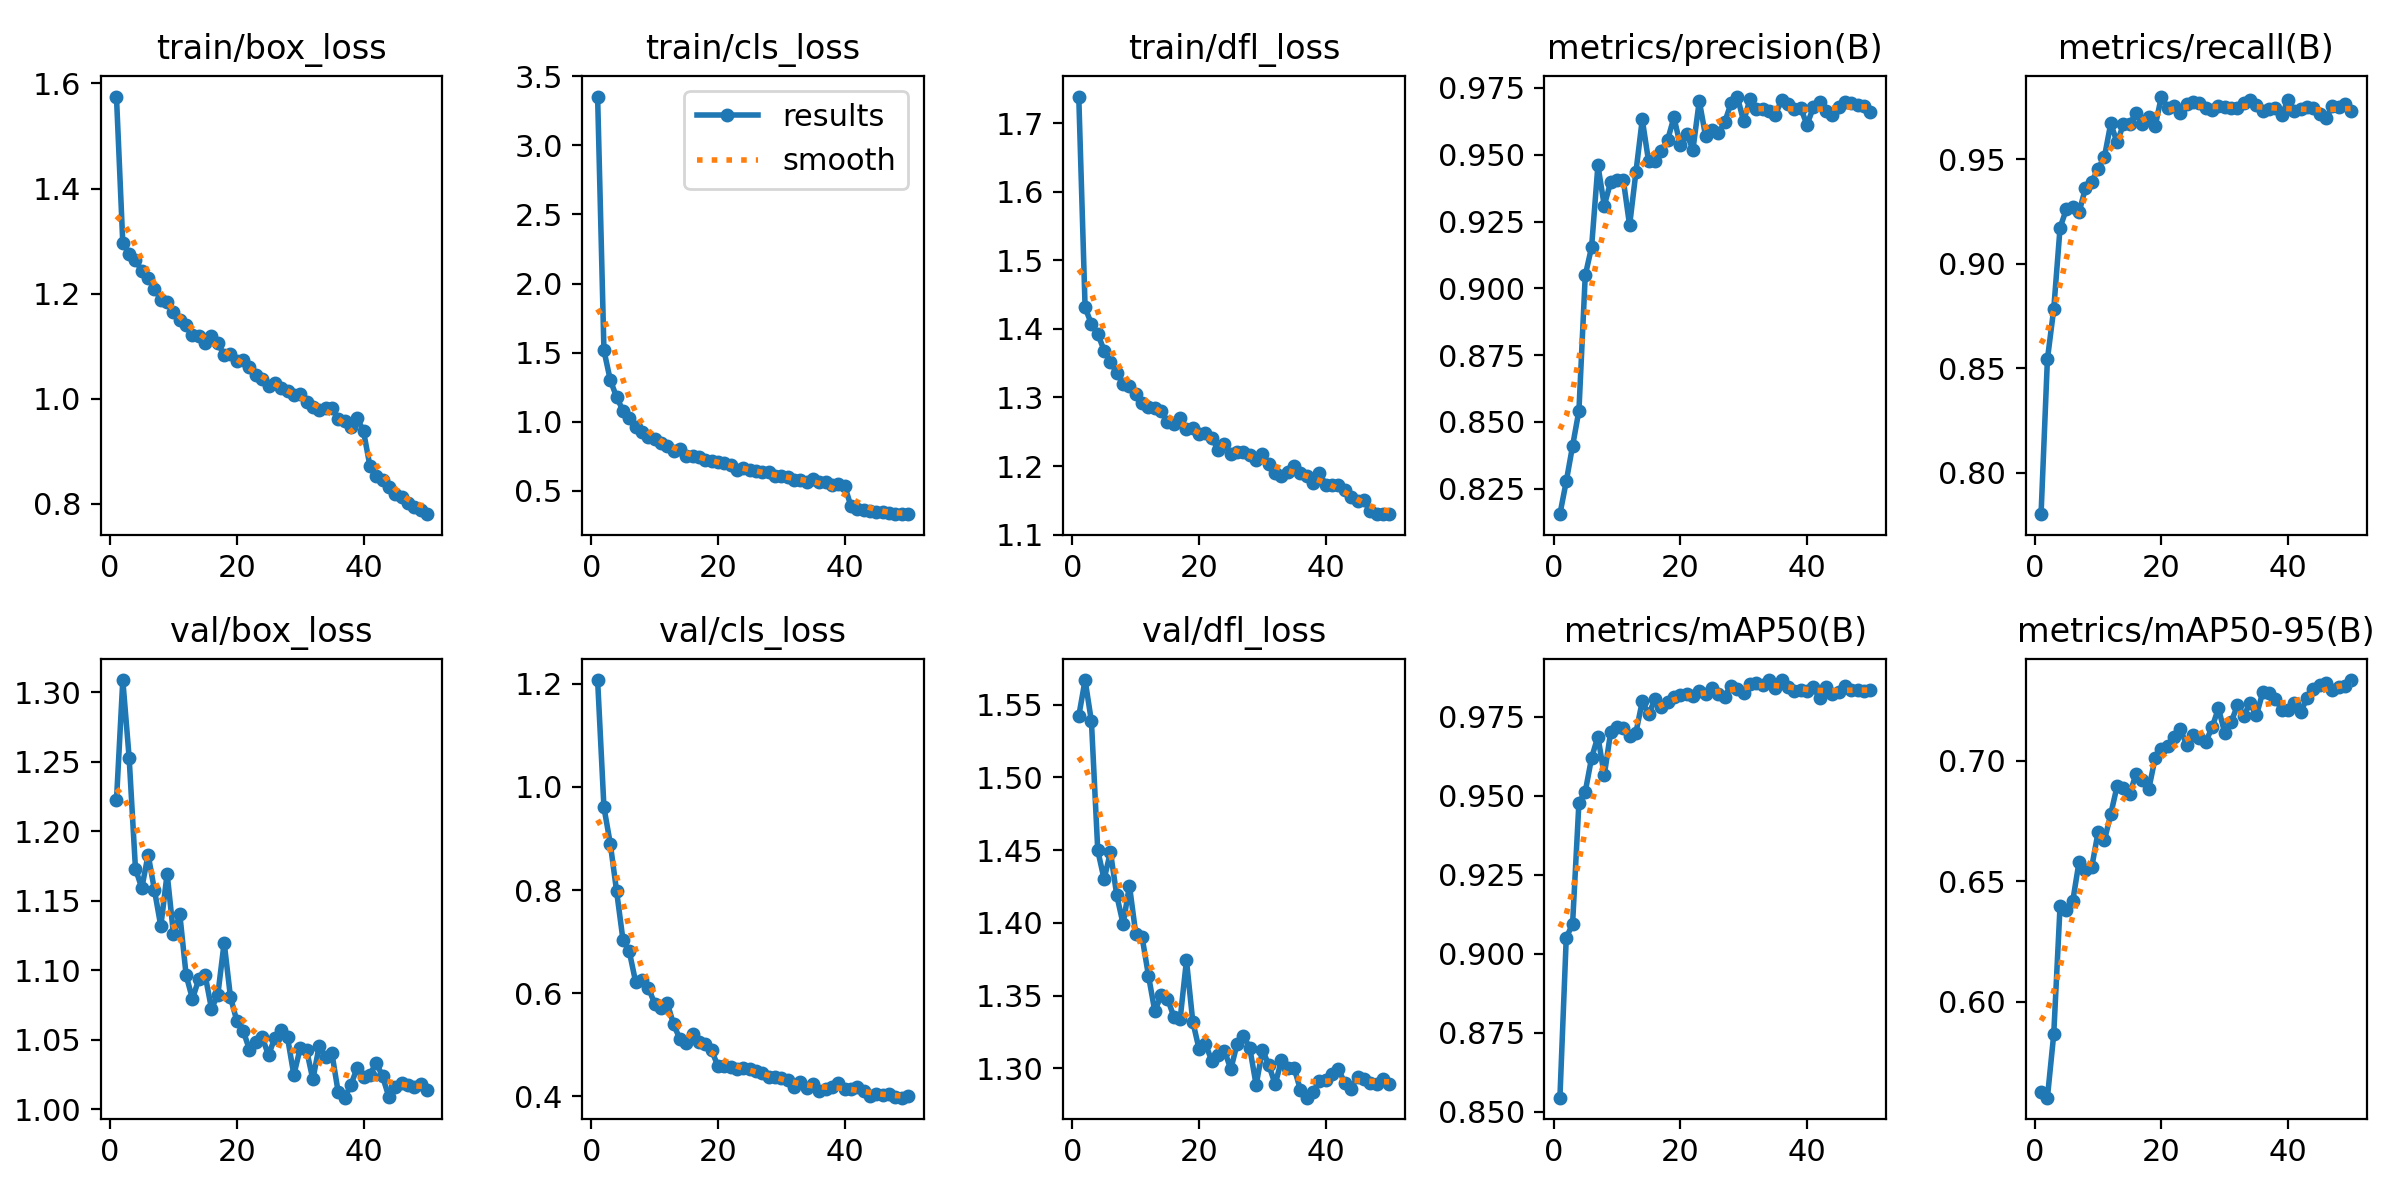

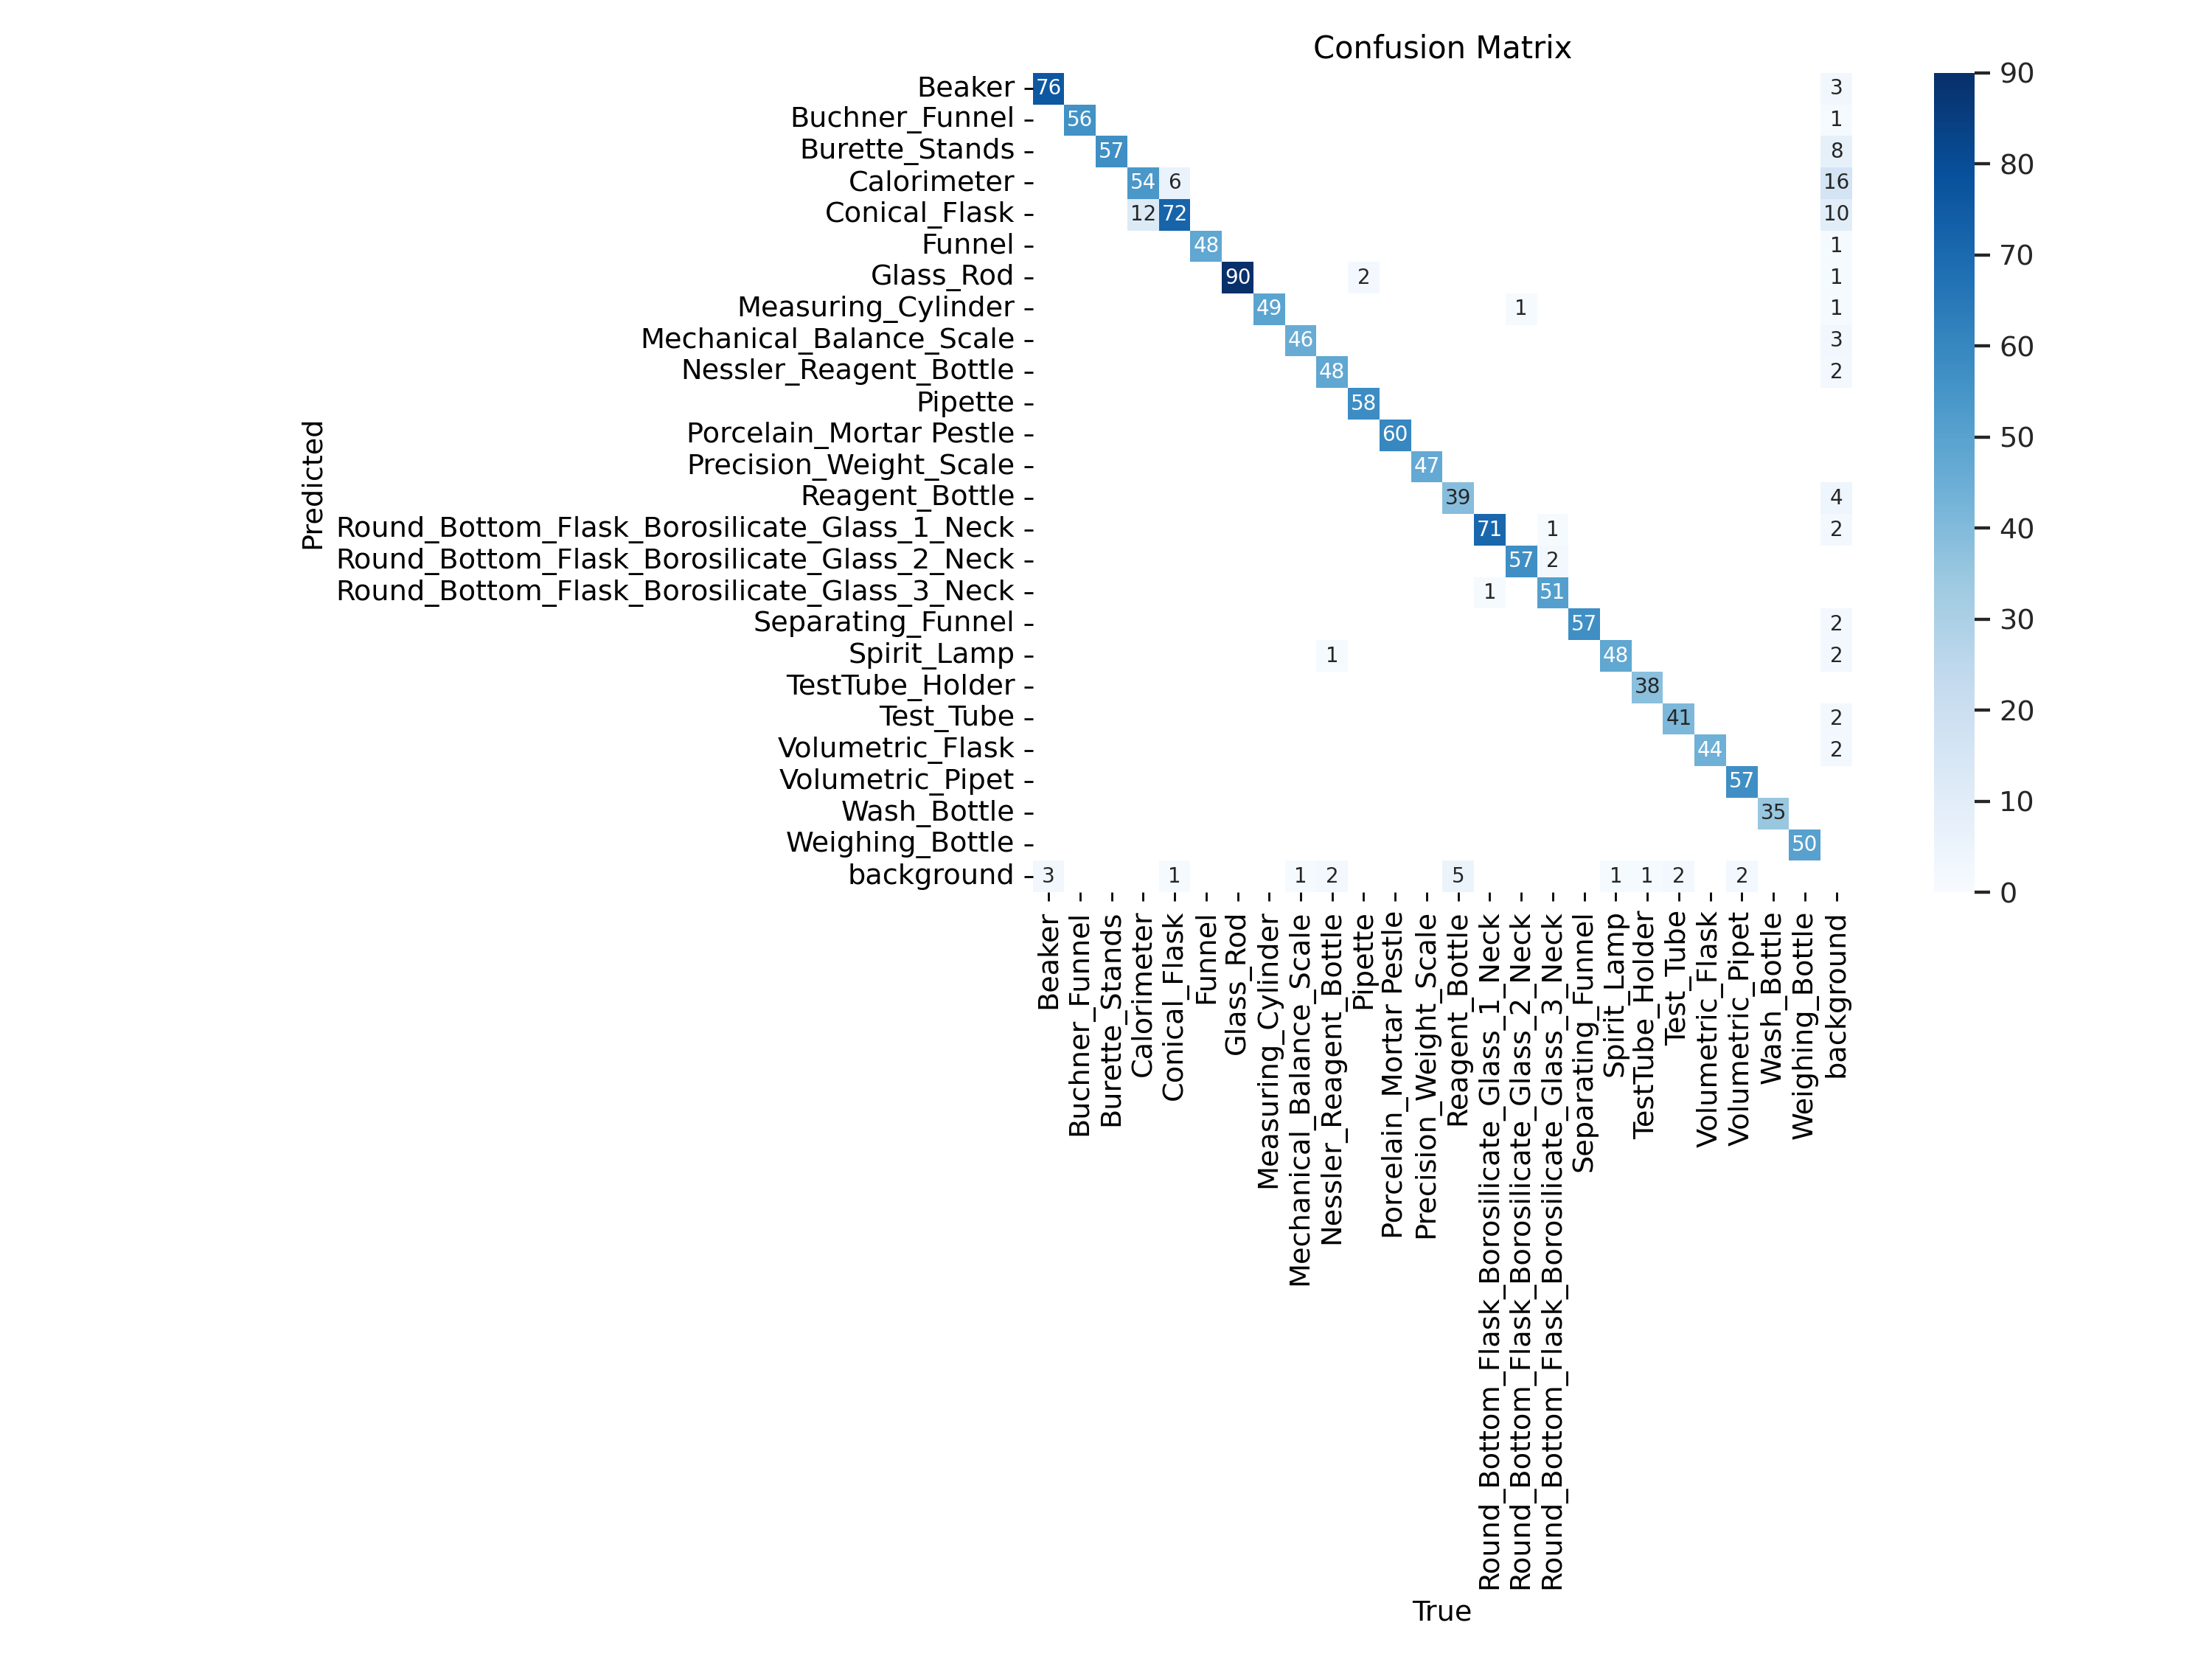

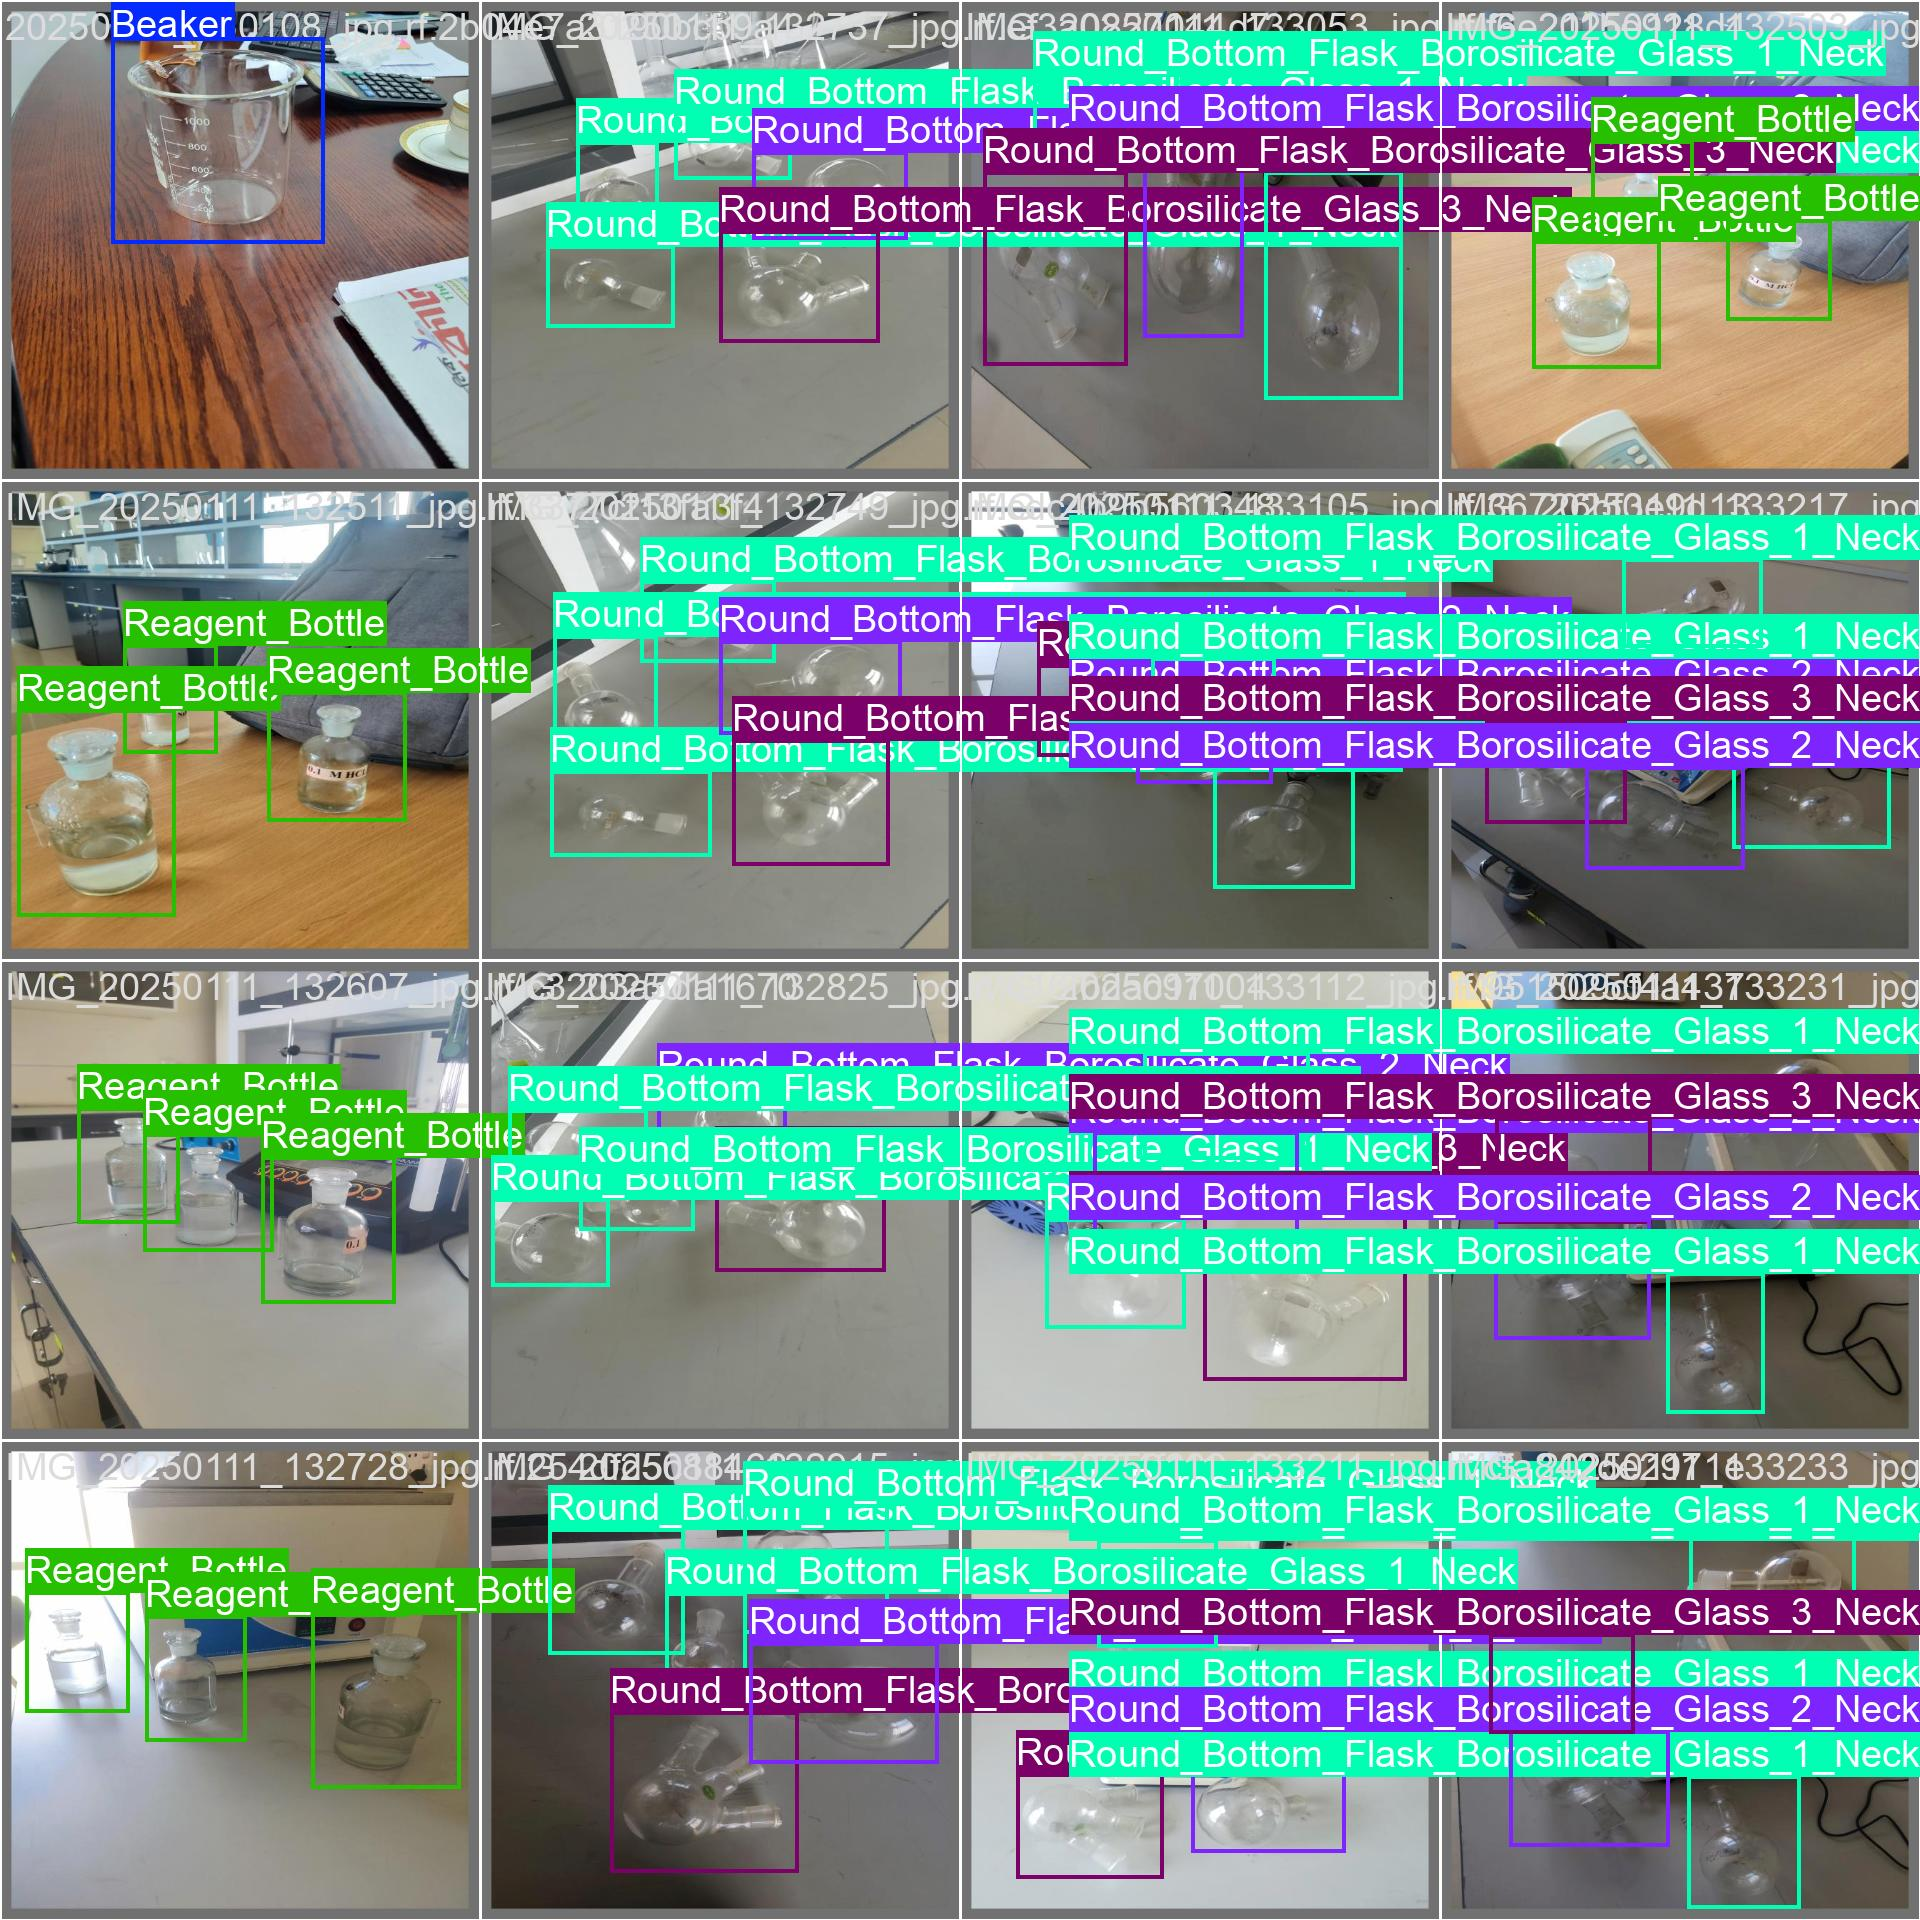

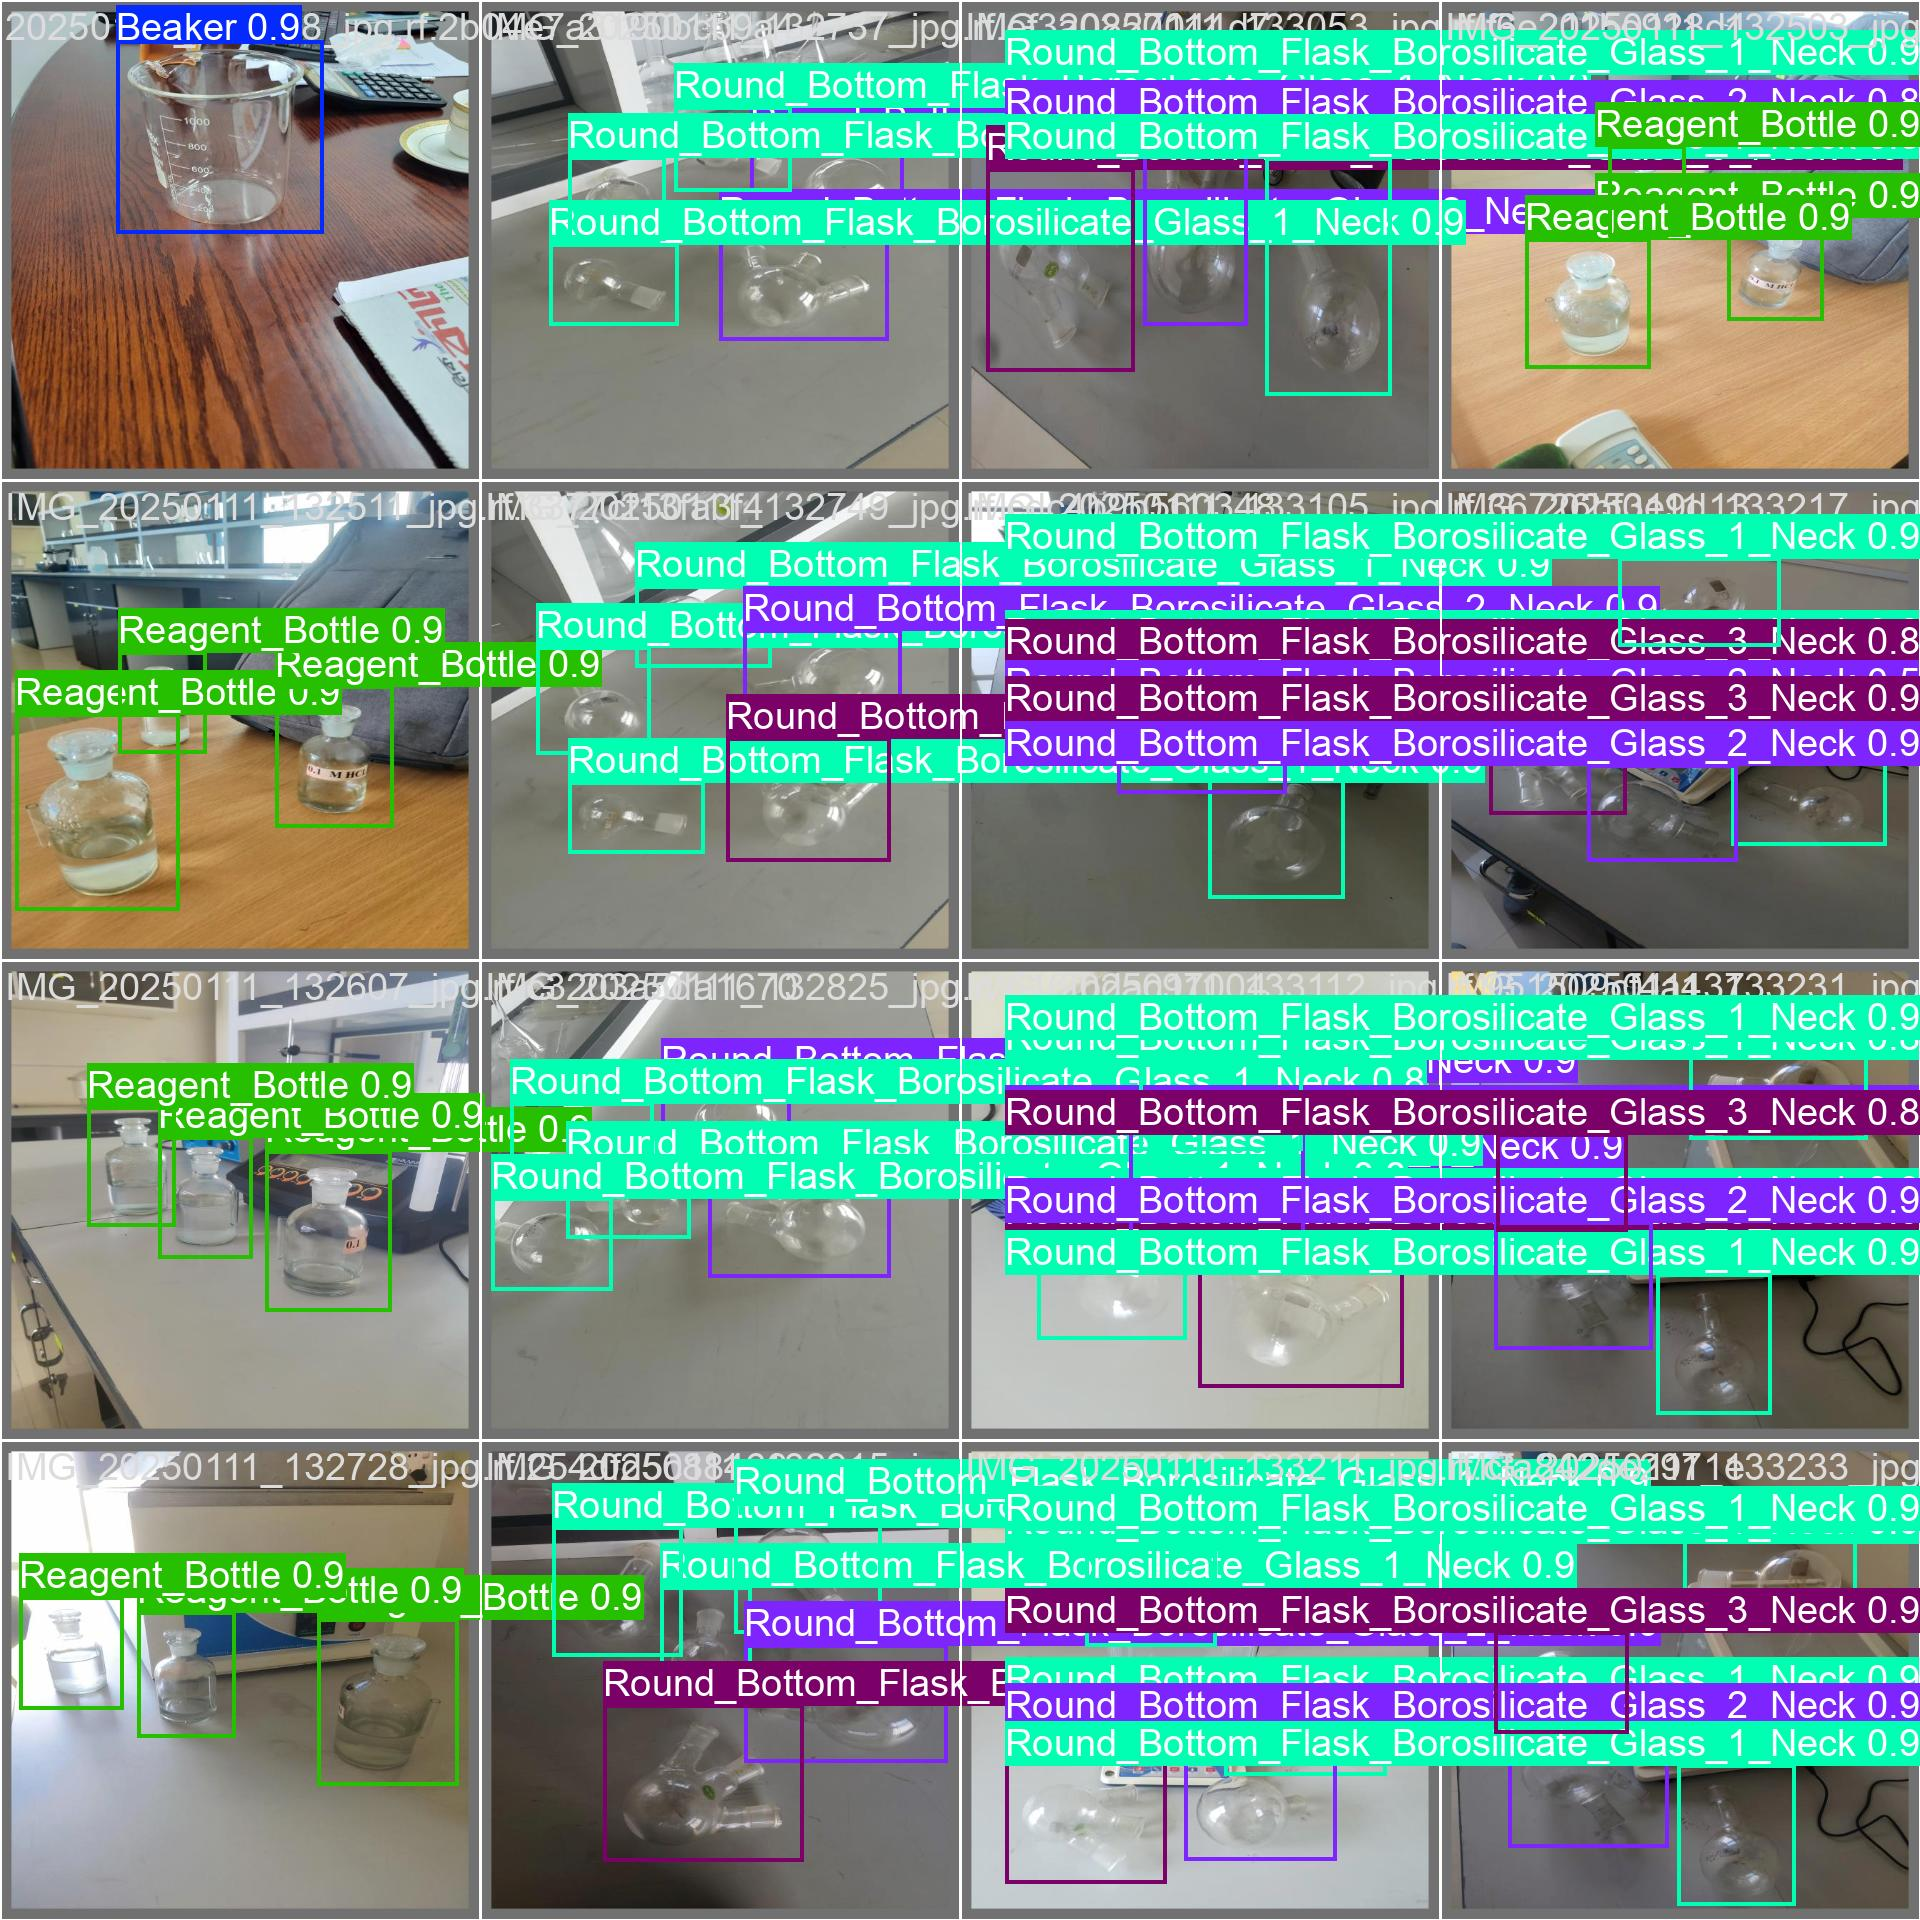

In [ ]:
from IPython.display import Image, display
import os

results_dir = '/content/runs/detect/chemistry_custom_model6'

result_files = [
    'results.png',
    'confusion_matrix.png',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg'
]

for file in result_files:
    file_path = os.path.join(results_dir, file)
    if os.path.exists(file_path):
        display(Image(filename=file_path, width=800))
        print("\n")
    else:
        print(f"⚠️ File not found: {file_path}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp {results_dir}/weights/best.pt '/content/drive/MyDrive/chemistry_model.pt'
print("Best model saved to Google Drive")

Mounted at /content/drive
Best model saved to Google Drive


In [ ]:
!zip -r /content/training_results.zip /content/runs/detect/chemistry_custom_model6

from google.colab import files
files.download('/content/training_results.zip')

  adding: content/runs/detect/chemistry_custom_model6/ (stored 0%)
  adding: content/runs/detect/chemistry_custom_model6/confusion_matrix_normalized.png (deflated 14%)
  adding: content/runs/detect/chemistry_custom_model6/results.csv (deflated 62%)
  adding: content/runs/detect/chemistry_custom_model6/F1_curve.png (deflated 11%)
  adding: content/runs/detect/chemistry_custom_model6/args.yaml (deflated 52%)
  adding: content/runs/detect/chemistry_custom_model6/weights/ (stored 0%)
  adding: content/runs/detect/chemistry_custom_model6/weights/best.pt (deflated 8%)
  adding: content/runs/detect/chemistry_custom_model6/weights/last.pt (deflated 8%)
  adding: content/runs/detect/chemistry_custom_model6/results.png (deflated 8%)
  adding: content/runs/detect/chemistry_custom_model6/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/chemistry_custom_model6/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/chemistry_custom_model6/val_batch1_labels.jpg (deflated 11%)
  addi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# (1) Best Model Performance
!echo "Best Model Metrics:" && tail -n 1 {results_dir}/results.csv

# (2) Class-wise AP (Average Precision)
!python -c "from ultralytics.utils.metrics import Metrics; \
m = Metrics('{results_dir}'); print(m.ap_class_index)"  # Class indexes
!python -c "from ultralytics.utils.metrics import Metrics; \
m = Metrics('{results_dir}'); print(m.ap50)"  # AP at IoU=0.50

Best Model Metrics:
50,3528.91,0.78036,0.33004,1.13003,0.9661,0.9732,0.98342,0.73356,1.0138,0.4,1.28953,1.0281e-05,1.0281e-05,1.0281e-05
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: cannot import name 'Metrics' from 'ultralytics.utils.metrics' (/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py)
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: cannot import name 'Metrics' from 'ultralytics.utils.metrics' (/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py)


task: detect
mode: train
model: yolov8s.pt
data: /content/Chemistry-Lab-Apparatus-DETN-8/data.yaml
epochs: 50
time: null
patience: 100
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: chemistry_custom_model6
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: null
multi_scale: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
keras: false
optimize: false
int

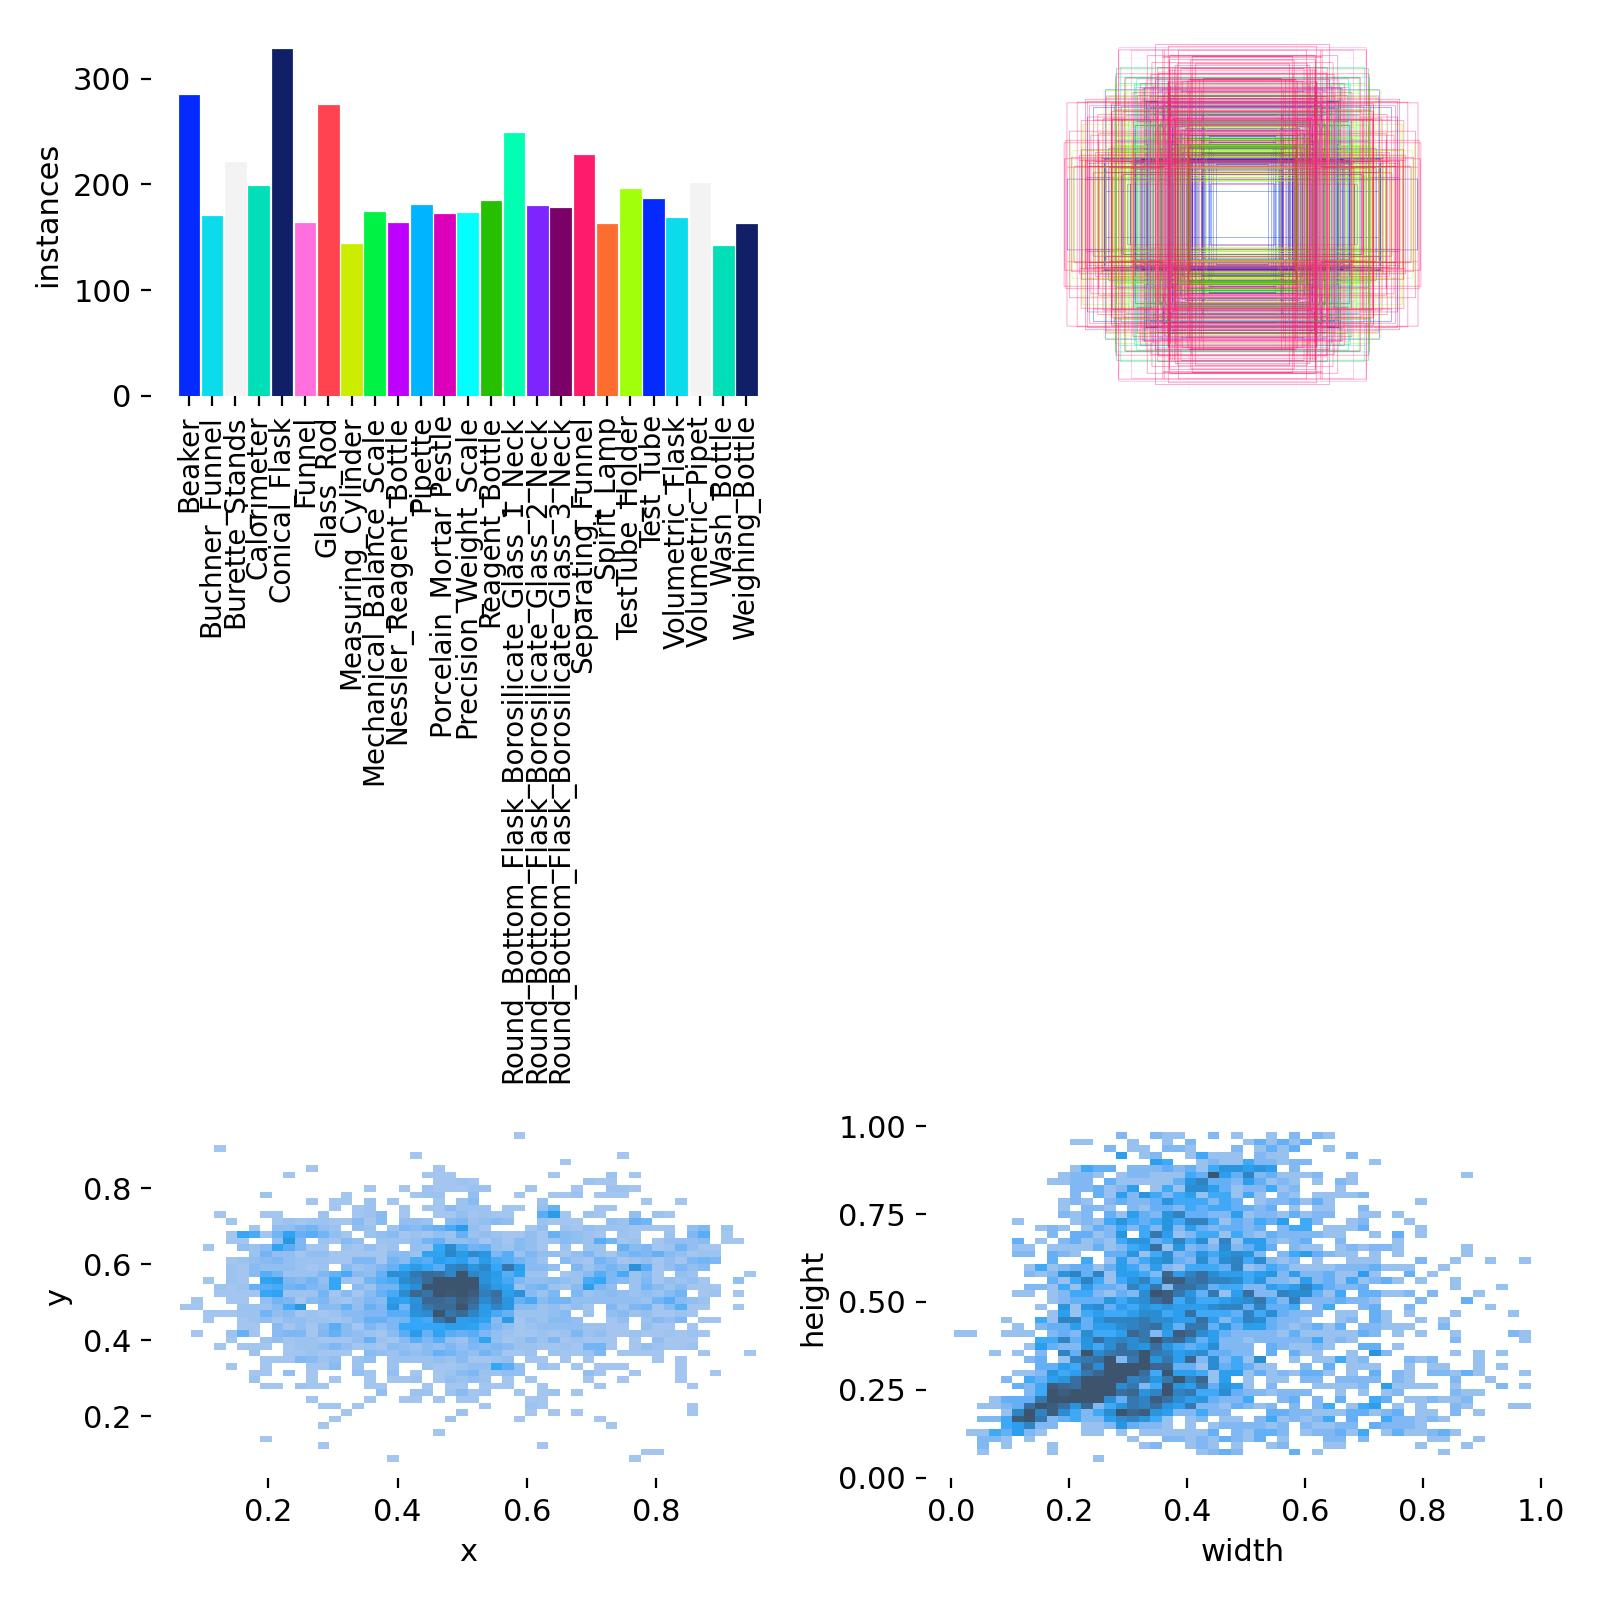

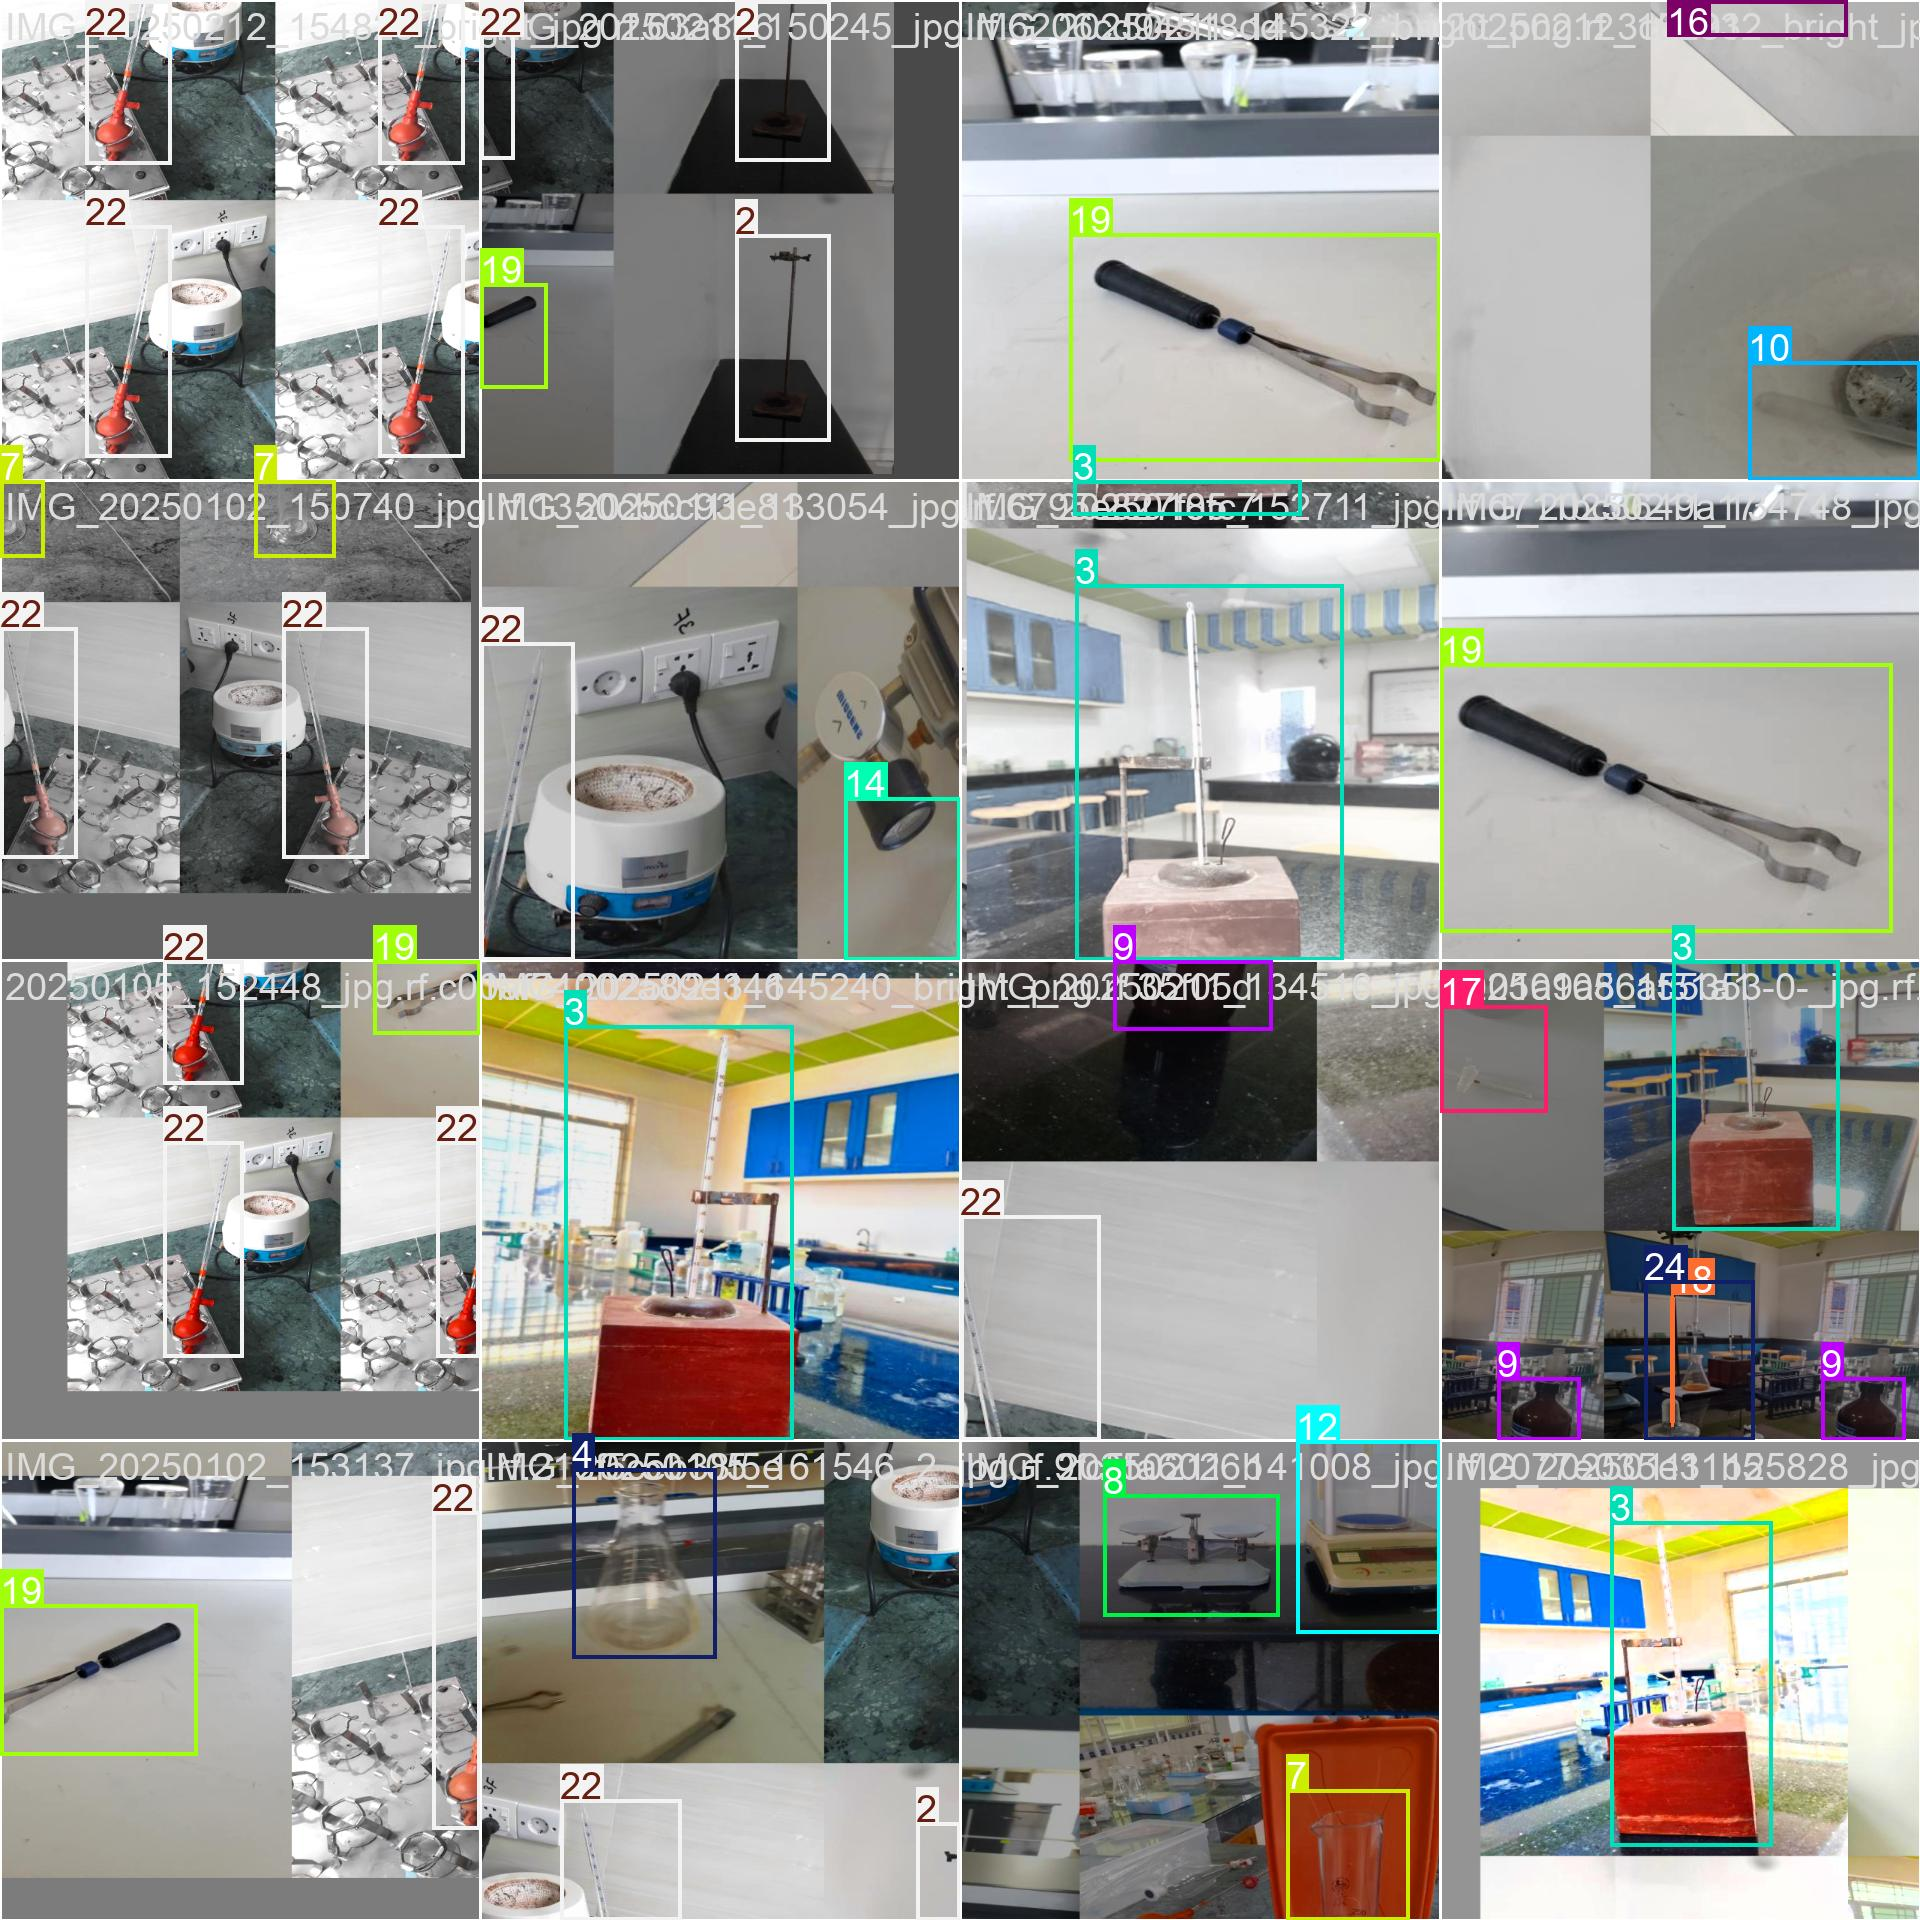

In [ ]:
# (1) Training Configuration
!cat {results_dir}/args.yaml

# (2) Label Distribution
display(Image(filename=f'{results_dir}/labels.jpg', width=700))
# Shows class distribution in dataset

# (3) Augmentation Examples
display(Image(filename=f'{results_dir}/train_batch0.jpg', width=700))
# Shows how training images were augmented

In [ ]:
!zip -r /content/chemistry_dataset.zip /content/Chemistry-Lab-Apparatus-DETN-8

from google.colab import files
files.download('/content/chemistry_dataset.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/IMG_20250211_150324_bright_png.rf.e1ee17c9c5b2fe78907817ca6ea73b1b.jpg (deflated 1%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/IMG_20250211_145556_bright_png.rf.773481001b0d75e933389600513d4acd.jpg (deflated 12%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/IMG_20250211_150245_jpg.rf.6206cd94518dd8c5c1a3785d12a6ad00.jpg (deflated 12%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/IMG_20250105_152951_jpg.rf.cbe30dfde8d21d1ded19eef888eaa695.jpg (deflated 2%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/IMG_20250105_153646_4_jpg.rf.7958735cbf071cd0867e0d557cdee5dd.jpg (deflated 6%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/20250105_153322_jpg.rf.8e1f9379668f6a88e6f5ecd36eebb8f8.jpg (deflated 23%)
  adding: content/Chemistry-Lab-Apparatus-DETN-8/train/images/20250105_152049_jpg.rf.0202f9aca

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>